# sets up

In [1]:
### automatically refresh the buffer
import math
%load_ext autoreload
%autoreload 2

### solve the auto-complete issue

%config Completer.use_jedi = False

### lvl 1 setups

import sys
sys.path.append('/portal1/1dell/GitHub/WAYS')
sys.path.append('/portal1/dell/GitHub/sanctuary')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import hstack
from matplotlib import pyplot

In [2]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from stats import cr
from gistool import basemap, stack_image, stack_shp, stack_hatch, stack_shp_cn, ncslice
from spatial import upscale
import statsmodels.formula.api as smf
from scipy.stats.mstats import theilslopes
from scipy.stats import kendalltau
import cartopy.crs as ccrs

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from __future__ import unicode_literals

In [3]:
import tifffile as tiff

In [4]:
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
clist=['#000000','#000000','#000000']
newcmp = LinearSegmentedColormap.from_list('chaos',clist)

In [5]:
from AdvisorMao_ import *
from gistool import *
from metpy.units import units
import metpy.calc as mpcalc

In [6]:
shp='/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Lancang_Mekong_Basin.shp'
file_shp = '/portal3/gis/Mekong_Delta/LANCANG_MEKONG.shp'

In [7]:
ds= xr.open_mfdataset('*.nc')

In [8]:
dsy= ds.resample(time='Y').mean(skipna=False)

In [9]:
u = dsy.u.values

In [10]:
v = dsy.v.values

## get 2019 wind each level

In [11]:
arr_wu19500 = u[-3][0]
arr_wu19850 = u[-3][1]
arr_wu19925 = u[-3][2]
arr_wu191000 = u[-3][3]
arr_wv19500 = v[-3][0]
arr_wv19850 = v[-3][1]
arr_wv19925 = v[-3][2]
arr_wv191000 = v[-3][3]

## get mean wind each level

In [12]:
arr_wum500 = np.mean(u,axis = 0)[0]
arr_wum850 = np.mean(u,axis = 0)[1]
arr_wum925 = np.mean(u,axis = 0)[2]
arr_wum1000 = np.mean(u,axis = 0)[3]
arr_wvm500 = np.mean(v,axis = 0)[0]
arr_wvm850 = np.mean(v,axis = 0)[1]
arr_wvm925 = np.mean(v,axis = 0)[2]
arr_wvm1000 = np.mean(v,axis = 0)[3]

## get ano wind each level

In [13]:
anou19500 = arr_wu19500 - arr_wum500
anou19850 = arr_wu19850 - arr_wum850
anou19925 = arr_wu19925 - arr_wum925
anou191000 = arr_wu191000 - arr_wum1000
anov19500 = arr_wv19500 - arr_wvm500
anov19850 = arr_wv19850 - arr_wvm850
anov19925 = arr_wv19925 - arr_wvm925
anov191000 = arr_wv191000 - arr_wvm1000

## mask wind < 0.5 m/s

In [14]:
uv = np.sqrt(anou19850**2+anov19850**2)
uv_masked = np.ma.masked_array(uv)
uv_masked[uv_masked<0.5] = np.ma.masked

## plot wind ano 2019

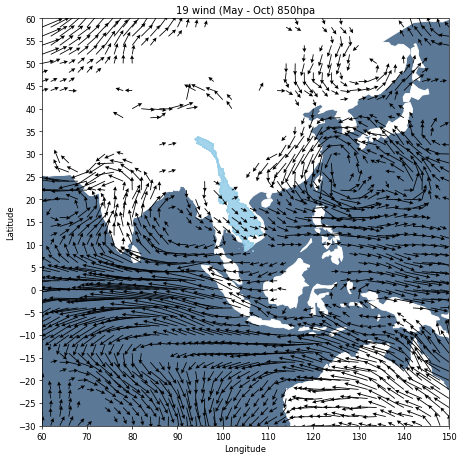

In [15]:
lon=np.linspace(60,150,361)
lat=np.linspace(60,-30,361)


plt.figure(figsize=(20,9), dpi=60)

# project

ax = plt.axes(projection= ccrs.PlateCarree() )


ax.add_feature(cfeature.OCEAN, facecolor='#5B7896',)
ax.add_feature(cfeature.LAND, facecolor='w', zorder=0)
# x label and tick
ax.set_xticks(np.linspace(-180, 180, 37))
ax.set_ylabel('Latitude',fontsize=10)
# y label and tick
ax.set_yticks(np.linspace(-90,90, 37))
ax.set_xlabel('Longitude',fontsize=10)

# set extent area
extent = [60,150,-22.2,51]
ax.set_extent(extent)

ax = stack_shp(ax,shp ,facecolor='#8ecae6', edgecolor='#8ecae6', linewidth=1, alpha=0.8,zorder=2)



ax.set_title('19 wind (May - Oct) 850hpa')
Q = ax.quiver(lon[::8], lat[::8], anou19850[::8,::8], anov19850[::8,::8],uv_masked[::8,::8],
              width=0.002,scale=30, cmap=newcmp,headwidth=5,zorder=6)
qk = ax.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')


#plt.savefig('windanoat850hpa.pdf')

plt.show()

## get dem data (global)

In [16]:
img = tiff.imread('GDEM-10km-BW.tif')

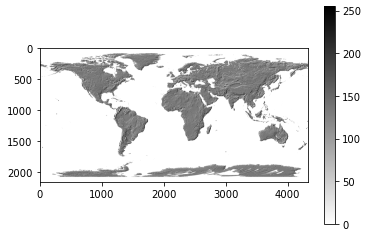

In [17]:
lon=np.linspace(-180,180,4320)
lat=np.linspace(90,-90,2160)
# compose dataset
ds = xr.Dataset({'dem': (['lat', 'lon'],img )},
                    coords={'lon': (['lon'], lon),
                            'lat': (['lat'], lat)})
im = plt.imshow(img, cmap='binary')
plt.colorbar(im)
plt.show()

## create a cmap

In [18]:
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
clist=['lightgrey','firebrick','lime']

## base map for traj

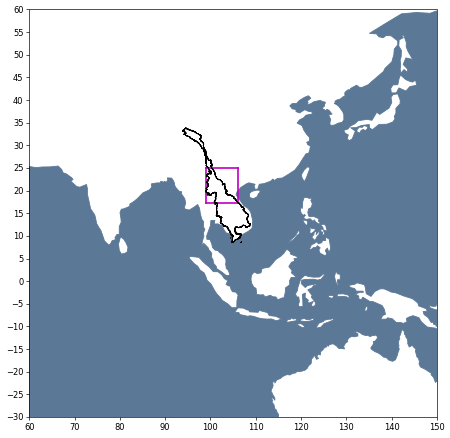

In [19]:
lon=np.linspace(60.00,150,361)
lat=np.linspace(-30,60,361)

# Create and define the size of a figure object 
plt.figure(figsize=(20,9), dpi=60)

# project
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)
#ax.gridlines(crs=ccrs.PlateCarree(),xlocs=list(np.linspace(-180,180,37)),ylocs=list(np.linspace(-90,90,37)),
 #                 linewidth=0.5, color='black', alpha=0.3,zorder=3)

ax.set_xticks(np.linspace(-180, 180, 37))

# y label and tick
ax.set_yticks(np.linspace(-90,90, 37))

# set extent area
extent = [60,150,-22.2,51]
ax.set_extent(extent)

# feature and mask

ax.add_feature(cfeature.OCEAN, facecolor='#5B7896')
ax = stack_shp(ax,shp ,facecolor='none', edgecolor='k', linewidth=1, alpha=1,zorder=5)



ax.plot([99,99], [17.25,25], '-',color='m',lw=2, transform=ccrs.PlateCarree())
ax.plot([106,106], [17.25,25], '-',color='m',lw=2, transform=ccrs.PlateCarree())
ax.plot([99,106], [17.25,17.25], '-', color='m',lw=2, transform=ccrs.PlateCarree())
ax.plot([99,106], [25,25], '-',color='m',lw=2, transform=ccrs.PlateCarree())
#plt.savefig('basemap.pdf')

plt.show()

## wind ano each year (level=850 mb)

In [20]:
dsy850 = dsy.sel(level = 850)

In [21]:
u850 = dsy850.u.values
v850 = dsy850.v.values

In [22]:
u819 = u850[-3]
v819 = v850[-3]

In [23]:
um = np.nanmean(u850,axis=0)
vm = np.nanmean(v850,axis=0)

In [24]:
uano = u819-um
vano = v819-vm

In [25]:
cef = dsy850.sel(latitude=dsy.latitude[180:221],longitude=dsy.longitude[100:141])
cef

<xarray.Dataset>
Dimensions:    (latitude: 41, longitude: 41, time: 63)
Coordinates:
  * time       (time) datetime64[ns] 1959-12-31 1960-12-31 ... 2021-12-31
  * longitude  (longitude) float32 85.0 85.25 85.5 85.75 ... 94.5 94.75 95.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... 5.75 5.5 5.25 5.0
    level      int32 850
Data variables:
    u          (time, latitude, longitude) float32 dask.array<chunksize=(1, 41, 41), meta=np.ndarray>
    v          (time, latitude, longitude) float32 dask.array<chunksize=(1, 41, 41), meta=np.ndarray>

In [26]:
ucef = cef.u.values
vcef = cef.v.values

In [27]:
ucefm = np.nanmean(ucef,axis=(1,2))
vcefm = np.nanmean(vcef,axis=(1,2))

ucef  
1.326e-05 x + 7.399
vcef  
0.007842 x + 3.032


Text(0.5, 1.0, '85E-95E,5N-25N 850mb')

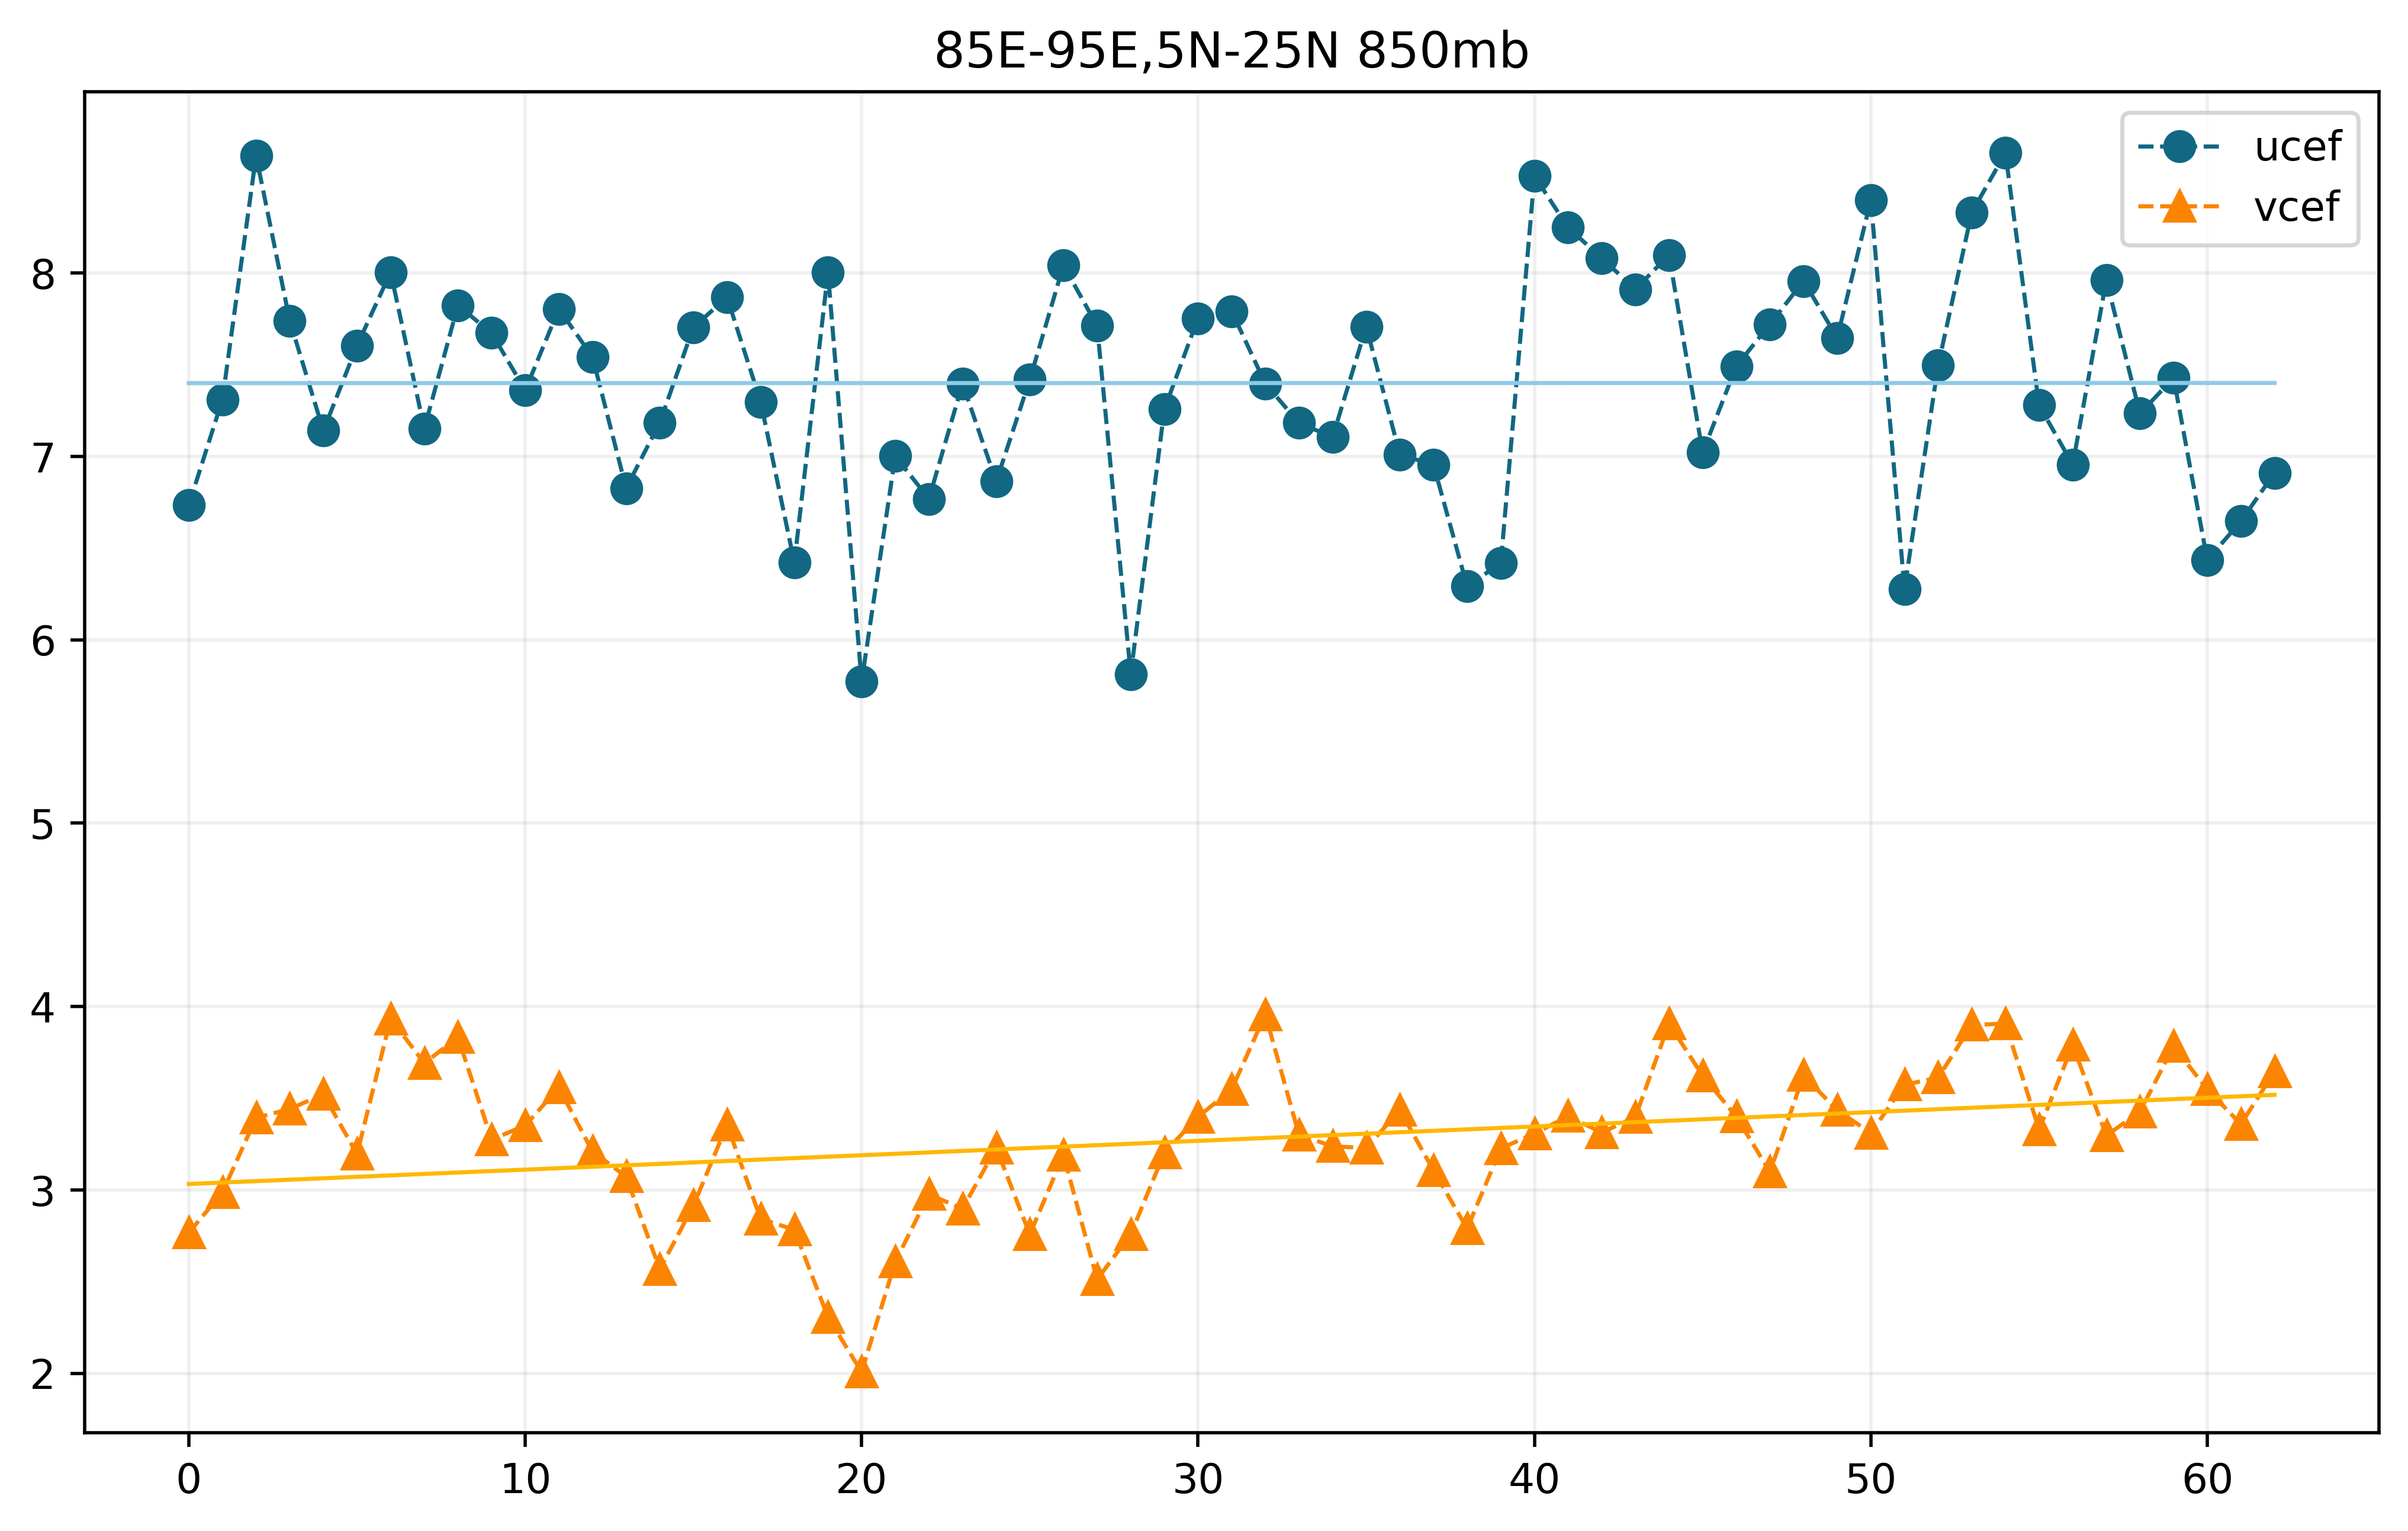

In [28]:
fig,ax = plt.subplots(figsize=(10,6),dpi=500)
x = np.arange(0,63)

### 1st
coeff1 = polyfit(x, ucefm, 1)
ax.plot(ucefm, '--o', ms=7, lw=1,c='#126782', mfc='#126782',label='ucef')
ax.plot(x,(coeff1[0]*x+coeff1[1]), c='#8ecae6',ls='-',lw=1)
print('ucef',poly1d(coeff1))

coeff2 = polyfit(x, vcefm, 1)
ax.plot(vcefm, '--^', ms=7, lw=1,c='#fb8500', mfc='#fb8500',label='vcef')
ax.plot(x,(coeff2[0]*x+coeff2[1]), c='#ffb703',ls='-',lw=1)
print('vcef',poly1d(coeff2))

#ax.set_ylim(3,7)
ax.legend()
ax.grid(alpha=0.2)
ax.set_title('85E-95E,5N-25N 850mb')
#plt.savefig('cefwind.pdf')

In [29]:
vcefm

array([2.7662733, 2.9862468, 3.3931658, 3.441188 , 3.5215704, 3.1953192,
       3.9339728, 3.691192 , 3.832061 , 3.27431  , 3.3514857, 3.5572357,
       3.2091174, 3.0730093, 2.5667803, 2.9144552, 3.354509 , 2.841858 ,
       2.7829647, 2.3057344, 2.007032 , 2.6082468, 2.9754076, 2.8976488,
       3.229364 , 2.7572076, 3.19039  , 2.5116258, 2.7583807, 3.2030168,
       3.3977785, 3.548658 , 3.9565046, 3.301246 , 3.2373238, 3.2290423,
       3.4342914, 3.1060538, 2.7892644, 3.2267115, 3.3067048, 3.401973 ,
       3.3130624, 3.3971453, 3.9068358, 3.622375 , 3.3998747, 3.0981221,
       3.624638 , 3.4340312, 3.3104844, 3.5733123, 3.611999 , 3.8989046,
       3.9071324, 3.329296 , 3.7893298, 3.2965877, 3.4262059, 3.7839444,
       3.5476902, 3.3587484, 3.644393 ], dtype=float32)

## check p-values

In [30]:
import scipy

In [31]:
from stats import cr

In [32]:
cr(ucefm)

(0.0008356768277420011,
 7.3998265,
 0.011293194843599178,
 0.9976484198238483,
 poly1d([1.32647116e-05, 7.39941536e+00]))